In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize_scalar

Q1

In [3]:
def simulate(n):
    x0 = np.random.uniform(0,2/n)
    y0 = np.random.uniform(0,2/n)

    x,y = [x0],[y0]

    for _ in range(n-1):
        x0 = x0 + np.random.uniform(0,2/n)
        y0 = y0 + np.random.uniform(0,2/n)
        x.append(x0 if x0 < 1 else 1)
        y.append(y0 if y0 < 1 else 1)
    return x,y

In [4]:
x,y = simulate(5)
print(x,y)

[0.3320193979877816, 0.5762798631498214, 0.9759656355262601, 1, 1] [0.07929195876415568, 0.3256355407818173, 0.6717174021748233, 0.8397153511754799, 1]


Q2

In [5]:
def minimize(x,y):
    """
    This function returns the x0 and y0 within the sequence(x,y) that minimizes the sum of distance between 0 to y and y to 1 respectively. 
    
    ---
    Arguments
    x0: float
    - intersection point
    
    x,y: lists
    - sequence of increasing floats
    
    ---
    Returns
    x0_star,y0_star: floats
    
    """
    
    x    = np.array(x)
    y    = np.array(y)
    obj  = lambda x0: np.sum(y[x<x0])+np.sum(1-y[x>=x0])
    res  = minimize_scalar(obj, bounds=(0,1),method='bounded')
    x0_star = x[x>=res.x][0]
    y0_star = y[x>=res.x][0]
    return x0_star,y0_star

In [6]:
minimize(x,y)

(0.9759656355262601, 0.6717174021748233)

In [7]:
n_list = np.arange(10,1000,10)
y_star_list = []

for n in n_list:
    x,y = simulate(n=n)
    x0_star,y0_star = minimize(x,y)
    y_star_list.append(y0_star)

Text(0.5, 1.0, 'Convergence of $y_k^*$')

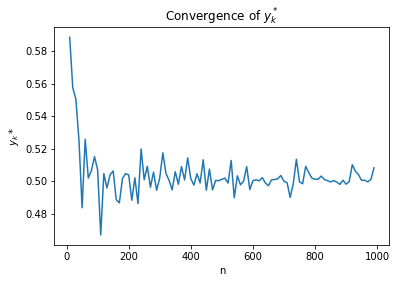

In [8]:
fig,ax = plt.subplots()
ax.plot(n_list,y_star_list)
plt.xlabel('n')
plt.ylabel('$y_k*$')
plt.title('Convergence of $y_k^*$')

$y_k^*$ seems to converge towards 0.5, which is the midpoint of the interval, given it's a uniform distribution that's as expected.